# Homework 1
## Mason Smith

In [109]:


# Import data and packages
import numpy as np
import matplotlib.pyplot as plt
X = np.loadtxt("Raisin_Dataset/Raisin_Dataset.csv", delimiter=",", dtype=object)
X[1:,:-1] = X[1:,:-1].astype(float)
print(f'Shape{X.shape}')
print(X[0:2,:])
labels = X[0,:].tolist()
N = X[1:,:-1].shape[0]

Shape(901, 8)
[['Area' 'MajorAxisLength' 'MinorAxisLength' 'Eccentricity' 'ConvexArea'
  'Extent' 'Perimeter' 'Class']
 [87524.0 442.2460114 253.291155 0.819738392 90546.0 0.758650579 1184.04
  'Kecimen']]


# Part 1

### 1. What is the number of classes in this dataset? (2 pts)
ANS: There are 2 classes: Kecimen and Besni raisin.

### 2. Calculate the log odds for the data. Write the discriminant function in terms of the log odds. (6 pts)
Log Odds: $log\frac{P(C_1|\mathbf{x})}{P(C_2|\mathbf{x})}$
Let: $C_1$ be Kecimen and $C_2$ be Besni

In [110]:
N = X[1:,:-1].shape[0]
P1 = np.sum((X[:,-1]=='Kecimen').astype(int))/N
P2 = np.sum((X[:,-1]=='Besni').astype(int))/N
LO = np.log(P1/P2)
print(f'Log Odds = {LO}')

Log Odds = 0.0


Discriminant:
- let $g(x) = log\frac{P(C_1|\mathbf{x})}{P(C_2|\mathbf{x})}$
- choose $c_1$ if $g(x)>0$ and $c_2$ otherwise

### 3. Assume that the input attributes are multivariate normal. Further assume that the input attributes in each class follow a different multivariate distribution. Calculate the mean vector and covariance matrix for the input attributes in each class. (Hint: consider your answer in 1. You should obtain this many sets of mean vector and covariance matrix.) (8 pts)

- Mean: $m_i = \frac{1}{N_i}\sum x_i$
- Cov: $S_i =(X_i - m_i)(X_i - m_i)^T$

In [111]:
# C = 'Kecimen' # class
Si = []
mi = []

for i, C in enumerate(['Kecimen','Besni']):
    ic = np.where(X[:,-1]==C)[0]#.flatten()
    Xi = X[ic,:-1].astype(float) # Input attributes for class c
    _mi = np.mean(Xi,axis=0) # mean vector
    _Si = np.cov(Xi.T) # covariance
    Si.append(_Si)
    mi.append(_mi)

    print('\n\n################################')
    print(f'###### FOR CLASS [{C}] #####')
    print(f'\nMean {_mi}')
    print(f"\nCovariance matrix of S \in {_Si.shape}\n {_Si}")



################################
###### FOR CLASS [Kecimen] #####

Mean [6.34134667e+04 3.52859249e+02 2.29352592e+02 7.41959536e-01
 6.56963556e+04 7.07774246e-01 9.83686236e+02]

Covariance matrix of S \in (7, 7)
 [[ 3.14273786e+08  9.48747383e+05  5.26930055e+05  1.22544439e+02
   3.34178076e+08 -2.07582479e+00  2.54722952e+06]
 [ 9.48747383e+05  3.55353016e+03  1.18448636e+03  2.51733540e+00
   1.03802111e+06 -5.20182414e-01  8.54753908e+03]
 [ 5.26930055e+05  1.18448636e+03  1.15999213e+03 -1.20695931e+00
   5.46132789e+05  3.02579660e-01  3.86602972e+03]
 [ 1.22544439e+02  2.51733540e+00 -1.20695931e+00  8.53068902e-03
   1.67623514e+02 -1.48948577e-03  2.94190389e+00]
 [ 3.34178076e+08  1.03802111e+06  5.46132789e+05  1.67623514e+02
   3.61223925e+08 -4.86447443e+01  2.79465818e+06]
 [-2.07582479e+00 -5.20182414e-01  3.02579660e-01 -1.48948577e-03
  -4.86447443e+01  1.88722736e-03 -1.03066330e+00]
 [ 2.54722952e+06  8.54753908e+03  3.86602972e+03  2.94190389e+00
   2.79465818e

## 4. Given  your  answer  in  3,  generate 10  samples from  each  of  the  multivariate  distributions.  (Hints:  the number of samples generated should be 10 times number of classes.) (10 pts)


In [112]:
Samples_i = []
for i, C in enumerate(['Kecimen','Besni']):
    samples_i = np.random.multivariate_normal(mi[i], Si[i],size=10)
    print(f'\n\nSamples for Ci={C} with shape {samples_i.shape}')
    print(samples_i)
    Samples_i.append(samples_i)



Samples for Ci=Kecimen with shape (10, 7)
[[3.08693022e+04 2.61406842e+02 1.74320188e+02 7.49264734e-01
  3.21571707e+04 6.92826236e-01 7.49516105e+02]
 [9.73076353e+04 4.64630244e+02 2.78669234e+02 8.12635844e-01
  1.01627422e+05 7.26506093e-01 1.27385615e+03]
 [2.84850005e+04 2.18124670e+02 1.79164413e+02 7.02265899e-01
  2.43022118e+04 7.13943512e-01 5.89280873e+02]
 [6.46564695e+04 3.10088707e+02 2.56441681e+02 5.83101472e-01
  6.40786212e+04 7.87440482e-01 9.16585898e+02]
 [6.95736766e+04 4.23238262e+02 2.06992559e+02 9.17349616e-01
  6.98575943e+04 6.69677152e-01 1.07194112e+03]
 [4.67391953e+04 3.33189194e+02 1.77274308e+02 8.75650467e-01
  5.02036319e+04 7.44645244e-01 8.66381872e+02]
 [6.92245500e+04 4.27562333e+02 2.02669228e+02 9.15455527e-01
  7.31614544e+04 6.80354060e-01 1.07639228e+03]
 [5.05403819e+04 3.77554838e+02 1.71995738e+02 9.16759619e-01
  5.42625263e+04 7.16322478e-01 9.57869480e+02]
 [6.97630586e+04 3.94145283e+02 2.21569631e+02 8.65886938e-01
  6.95494728e+

## 5.  Given  the  assumption  that  input  attributes  are  multivariate  normal,  visualize  the  joint  distribution  of “MajorAxisLength”  and  “MinorAxisLength” for   each   class. Based  on  the  “multivariate  normal” assumption,  do  you  think  that “MajorAxisLength” and “MinorAxisLength” are  both univariate normal, and why? (Hint: use your results from 3 and visualize the parametric form of distribution. Create grids for [0,800]×[0,800] for 3D plots.) (10 pts)

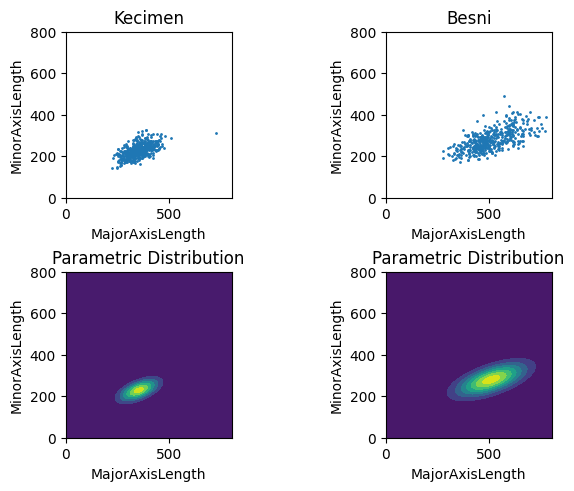

In [113]:
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
fig,axs = plt.subplots(2,2,constrained_layout=True)
for i, C in enumerate(['Kecimen','Besni']):
    xmin = 0
    xmax = 800
    # Plot scatterplot
    ic = np.where(X[:,-1]==C)[0]#.flatten()
    Xi = X[ic,:-1].astype(float) # Input attributes for class c
    xi_MajorAxisLength = Xi[:,1]
    xi_MinorAxisLength = Xi[:,2]
    axs[0,i].scatter(xi_MajorAxisLength,xi_MinorAxisLength,s=1)
    axs[0,i].set_title(C)
    axs[0,i].set_xlabel('MajorAxisLength')
    axs[0,i].set_ylabel('MinorAxisLength')
    axs[0,i].set_xlim([xmin,xmax])
    axs[0,i].set_ylim([xmin,xmax])
    axs[0,i].set_aspect('equal', adjustable='box')


    # use your results from 3 and visualize the parametric form of distribution. Create grids for [0,800]×[0,800] for 3D plots.
    mean = mi[i][1:3]
    covariance_matrix = Si[i][[1,2],:][:,[1,2]]
    x, y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(xmin, xmax, 100))
    pos = np.dstack((x, y))
    pdf_values = multivariate_normal.pdf(pos, mean=mean, cov=covariance_matrix)
    axs[1,i].contourf(x, y, pdf_values, cmap='viridis')
    axs[1,i].set_xlabel('MajorAxisLength')
    axs[1,i].set_ylabel('MinorAxisLength')
    axs[1,i].set_title('Parametric Distribution')
    axs[1,i].set_xlim([xmin,xmax])
    axs[1,i].set_ylim([xmin,xmax])
    axs[1,i].set_aspect('equal', adjustable='box')
plt.show()

Since the input data is multi-variate normal, the MajorAxisLength and MinorAxisLength are both univariate normal as confirmed by the above plots.

## 6. Given your answers in 3,write the functional form of the likelihood ratio. You may define notations for the mean and covariance of each class. (6 pts)

- Let: $C_1$ be Kecimen and $C_2$ be Besni
- Likelihood Ratio: $\frac{p(x|C_1)}{p(x|C_2)}$
- $ p(\mathbf{x}|C_1) = \frac{1}{(2\pi)^{d/2}|\Sigma_1|^{1/2}}   exp\Big(-\frac{1}{2}(\mathbf{x}-\mu_1)^T \Sigma_1^{-1} (\mathbf{x}-\mu_1)\Big)$
- $ p(\mathbf{x}|C_2) = \frac{1}{(2\pi)^{d/2}|\Sigma_2|^{1/2}}   exp\Big(-\frac{1}{2}(\mathbf{x}-\mu_2)^T \Sigma_2^{-1} (\mathbf{x}-\mu_2)\Big)$

## 7.  Given  your  answers  in  3  and  6,  write  the discriminant function for  each  class.  Then,  calculate  the discriminant functions it for each sample point and label each of them with the class name. (Hint: see Eq. (4.20) in textbook. The “label” here is based on your calculated discriminant. You may store the labels in an Excel or .csv file.) (10 pts)


Eq. (4.20): $g_i(x) = log\;p(x|C_i) + log \;P(C_i)$
Assume $p(x|C_i)$ is Gaussian (from problem 6)
We get discriminant function: $g_i(x) = -\frac{1}{2}log(2\pi)-log(\sigma_i^2)+log(P(C_i))$

$g_i(\mathbf{x})= log\;p(\mathbf{x}|C_i) + log \;P(C_i) = -\frac{d}{2}log(2\pi)-\frac{1}{2}log|\Sigma_i|-\frac{1}{2}(\mathbf{x}-\mu_i)^T \Sigma_i^{-1} (\mathbf{x}-\mu_i) + log(P(C_i))$

Sample Discriminant (5.19):
$g_i(\mathbf{x})= -\frac{1}{2}log|S_i|-\frac{1}{2}(\mathbf{x}-m_i)^T S_i^{-1} (\mathbf{x}-m_i) + log(P(C_i))$

In [114]:
def problem_7():
    rt = [] # true label
    rhat_t = [] # predicted label
    P_Ci = 0.5 # prob of observing class i
    for t in range(N):
        # Get sample
        xt = X[t+1,:-1].astype(float)

        # Clac Discriminant for each class i
        gi = [None,None]
        for i in range(2):
            term1 = -0.5*np.log(np.linalg.det(Si[i]))
            term2 = -0.5*(xt-mi[i]) @ np.linalg.inv(Si[i]) @ (xt -mi[i]).T
            term3 =  np.log(P_Ci)
            gi[i] = term1+term2+term3

        # Store prediciton and true label
        rt.append( 0 if X[t+1,-1]=="Kecimen" else 1) # true label
        rhat = np.argmax(gi)
        rhat_t.append(rhat)
    # accuracy = np.mean([int(rhat_t[t]==rt[t])for t in range(N)])
    # print(f'Perc. Correct: {accuracy}')
    # print(rhat_t) print(rt)
    return rt, rhat_t
rt,rhat_t = problem_7()
accuracy = np.mean([int(rhat_t[t]==rt[t])for t in range(N)])
print(f'Perc. Correct: {accuracy}')

Perc. Correct: 0.86


## 8. Given your answers in 3 and 6, if pooling the covariance of all classes, write the discriminantfunction for eachclass. Then, calculate the discriminant functions it for each sample point and label each of them with the class name. (Hint: see Eq. (5.21) and (5.22) in textbook. The “label” here is based on your calculated discriminant. You may store the labels in an Excel or .csv file.) (10 pts)

Another possibility is to pool the data and estimate a common covariance matrix for all classes:
- $\mathbf{S}=\sum_i \hat{P}(C_i)S_i$
- (5.19) reduces to $g_i(\mathbf{x})=-\frac{1}{2}(\mathbf{x}-m_i)^T S^{-1}(\mathbf{x}-m_i) + log \hat{P}(C_i)$

In [115]:
def problem_8():
    Phat_Ci = [0.5,0.5] # prob of observing class i
    S_pooled = (Phat_Ci[0])*Si[0] + (Phat_Ci[1])*Si[1]

    rt = [] # true label
    rhat_t = [] # predicted label
    for t in range(N):
        # Get sample
        xt = X[t+1,:-1].astype(float)

        # Clac Discriminant for each class i
        gi = [None,None]
        for i in range(2):
            term1 = -0.5*(xt-mi[i]) @ np.linalg.inv(S_pooled) @ (xt -mi[i]).T
            term2 =  np.log(Phat_Ci[i])
            gi[i] = term1+term2

        # Store prediciton and true label
        rt.append( 0 if X[t+1,-1]=="Kecimen" else 1) # true label
        rhat = np.argmax(gi)
        rhat_t.append(rhat)
    accuracy = np.mean([int(rhat_t[t]==rt[t])for t in range(N)])
    # print(f'Perc. Correct: {accuracy}')
    # print(rhat_t) print(rt)
    return rt, rhat_t
rt,rhat_t = problem_8()
accuracy = np.mean([int(rhat_t[t]==rt[t])for t in range(N)])
print(f'Perc. Correct: {accuracy}')

Perc. Correct: 0.86


## 9.  Use  a confusion  matrix to  show  the  classification  results  with  the discriminant functionin  7  and  8, respectively. Calculate the classification accuracy for both and compare the results.Briefly describe your findings.(Hint: you will obtain 2 confusion matrices, one for the result in 7 and the other for 8.) (8 pts)

In [116]:
from sklearn.metrics import confusion_matrix
rt,rhat_t = problem_7()
CM = confusion_matrix(rt, rhat_t)
print()
pc_i = [None,None] # percent correct for class i
for i in range(2):
    nc = CM[i,i] # number of correct
    Ni = np.sum(CM[i,:]) # total in class
    pc_i[i] = nc/Ni # percent correct
acuraccy = np.mean(pc_i)
print(f'######## From Problem 7 ##############')
print(f'Confusion Matrix: \n{CM}')
print(f'Accuracy per class: {np.round(pc_i,2)}')
print(f'Classification Accuracy: {np.round(acuraccy,2)}')


rt,rhat_t = problem_8()
CM = confusion_matrix(rt, rhat_t)
print()
pc_i = [None,None] # percent correct for class i
for i in range(2):
    nc = CM[i,i] # number of correct
    Ni = np.sum(CM[i,:]) # total in class
    pc_i[i] = nc/Ni # percent correct
acuraccy = np.mean(pc_i)
print(f'######## From Problem 8 ##############')
print(f'Confusion Matrix: \n{CM}')
print(f'Accuracy per class: {np.round(pc_i,2)}')
print(f'Classification Accuracy: {np.round(acuraccy,2)}')


######## From Problem 7 ##############
Confusion Matrix: 
[[430  20]
 [106 344]]
Accuracy per class: [0.96 0.76]
Classification Accuracy: 0.86

######## From Problem 8 ##############
Confusion Matrix: 
[[392  58]
 [ 68 382]]
Accuracy per class: [0.87 0.85]
Classification Accuracy: 0.86


Discussion: Problem 7 formulation correctly classified Kecimen but incorrectly classified Bensi whereas Problem 8 was more balanced. However, total prediction accuracy across both formulations was the same


----------
# Part 2 (60 pts)
Do  4-fold  cross  validation  for  the  data set and  perform  classification  analysis:
(1)  randomly  shuffle  the samples,
(2) partition the data into 4 folds,
(3) choose 3 out of the 4 folds as training data and the rest 1 as testing data (you can do this for 4 times by choosing 3 different folds each time)

For each of the 4 replicates, do the following:

### 1.  Assume  that  the  input  attributes  are multivariate  normal.  Calculate  the  mean  vector  and  covariance matrix for the input attributes in each class using the training data. (10 pts)


### 2. Given your answers in 1, calculate the discriminant functionfor the testing data. Then label each testing sample with the class name. Finally, create a confusion matrixto show the classification result for testing data.(Hint: You may store the labels in an Excel or .csv file.)(15 pts)

### 3. Given your answers in 1, if poolingthe covariance of all classes, calculatethe discriminantfunctionfor thetesting data. Then label each testing sample with the class name. Finally, create a confusion matrixto show the classification result for testing data.(Hint: You may store the labels in an Excel or .csv file.)(15 pts)


### 4. Forthediscriminantfunctions in 2 and 3, respectively, calculate  the  average false positive rate, false negative  rate, true  positive  rate,  and true  negative  ratefor  the  classification  results  throughout  the  4 replicates that you have completed.(Hint: you will get four rates for each classification method.) (15 pts)

### 5. Briefly describe the performance of each discrimination methodand identify the best one for this datasetbased on the average performance across 4-fold cross validation.(5 pts)

-----
# Part 3(70 pts)
For this part, take “Area”, “MajorAxisLength”, “MinorAxisLength”, “Electricity”, “Extent”, “Perimeter” as independent variables, and “ConvexArea” as dependent variables

1. Visualize “ConvexArea” against each independent variable and describe the trend and patterns in your plots. (Hints: you will get 6 plots, each with “Area” as the vertical axis and an independent variable as the horizontal axis.) (8 pts)

2. Use the first 600 samples in the dataset as the training data and the rest as the testing data. Calculate the correlation matrix for all dependent and independent variables for the training data. Based on the correlation matrix, identify which independent variables have major impact to the dependent variable. Does the impact imply a causal relationship and why? (Hint: Save the correlations in an Excel or .csv file.) (8 pts)


3. Use Python to fit a linear regression model using the training data. Summarize the model coefficients. Based on the coefficients, which independent variables have more impact  to the dependent variable? (10 pts)


4. Use the model fitted in 3 to make predictions for testing data. Calculate the mean squared errorfor the testing samples with respect to the predictions. Do you think the model has a good prediction performance? (Hint:  input  the  testing  samples  of  independent  variables  into  your  fitted  model  and  then  evaluate  the prediction against the true sample values of dependent variable.) (8 pts)